# KNN - Iris dataset

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_iris

In [27]:
iris = load_iris()
# iris

In [9]:
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [22]:
df.shape

(150, 5)

#### 1) Studying the linear relationship between the variables

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

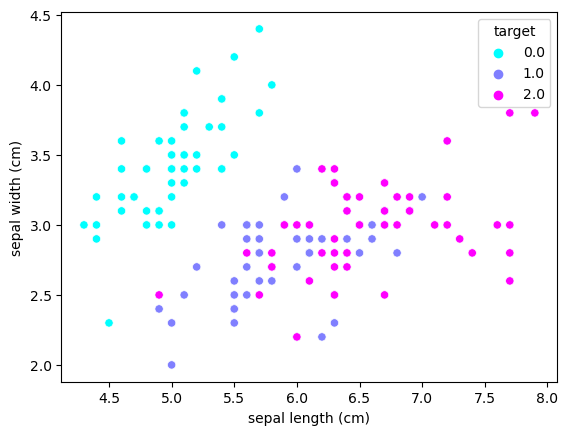

In [17]:
sns.scatterplot(df, x=df['sepal length (cm)'], y=df['sepal width (cm)'],
                hue=df['target'], palette='cool')

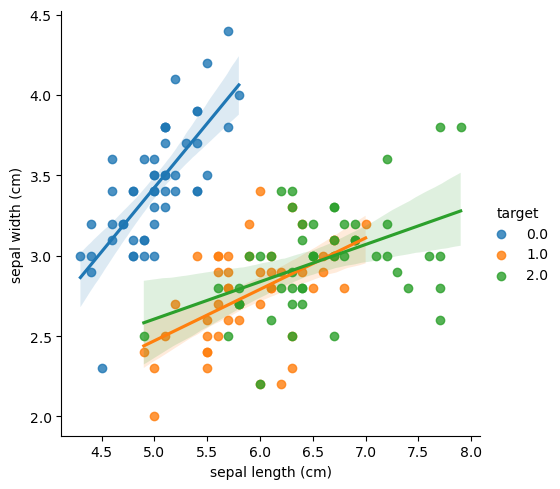

In [20]:
sns.lmplot(x='sepal length (cm)' ,y='sepal width (cm)', data=df, hue='target')

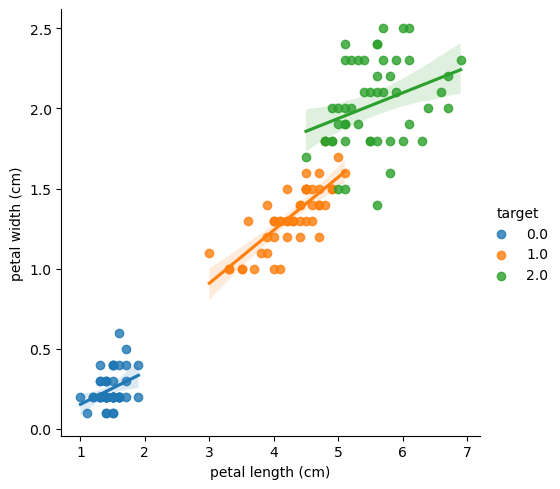

In [21]:
sns.lmplot(x='petal length (cm)' ,y='petal width (cm)', data=df, hue='target')

##### 2) Get the data ready for the model (ie. distinguis between x & y varaibles)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
# df.iloc # iloc (i)ndex, access rows/cols using indexes; (l)abels, column names and rows
# df.loc
x = np.array(df.iloc[ : , 0:4]) # columns 0 to 4
y = np.array(df['target'])

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
y_pred = knn.predict(x_test)
print(y_pred.shape)
y_pred

(45,)


array([0., 1., 0., 1., 1., 1., 2., 1., 0., 1., 2., 0., 1., 1., 1., 0., 2.,
       2., 1., 2., 0., 2., 1., 2., 0., 2., 2., 2., 1., 2., 1., 1., 0., 2.,
       0., 1., 1., 1., 1., 2., 1., 1., 2., 0., 1.])

In [57]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [74]:
comparison = (y_test == y_pred)
print(comparison)

np.count_nonzero(comparison)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True]


41

In [80]:
# for 10 values of k, generate 10 random train-test splits
# and calculate avg accuracy for each value of k
k_vals = [1,3,5,10,15,20,25,30,35,40]
num_splits = 10
accuracy_list = []
comparison_list = [] # collects num of TRUE values

# for k = 1
# 10 train-tests amples will be generated (ie, don't set random_state param to an integer)
# Accuracy for each of these 10 train-test samples will be calculated. Each accuracy will be written into a list 'acc_of_samples'
# Mean accuracy for 'k=1' will be calculated over the 10 values of accuracy contained in 'acc_of_samples'

for k in k_vals:
    acc_of_samples = []
    comp_of_samples = []
    for i in range(num_splits):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        acc_of_samples.append((accuracy_score(y_test, y_pred)))
        comp_of_samples.append((np.count_nonzero(y_test == y_pred)))
    accuracy_list.append(np.mean(acc_of_samples))
    comparison_list.append(np.mean(comp_of_samples))

# create a DF:
compare_df = pd.DataFrame({'Num_of_correct_predictions': comparison_list,
             'Avg_accuracy': accuracy_list}, index = k_vals)

# comparison_list     # num of correct predictions
# accuracy_list       # avg accuracy for each value of k

Text(0, 0.5, 'Accuracy')

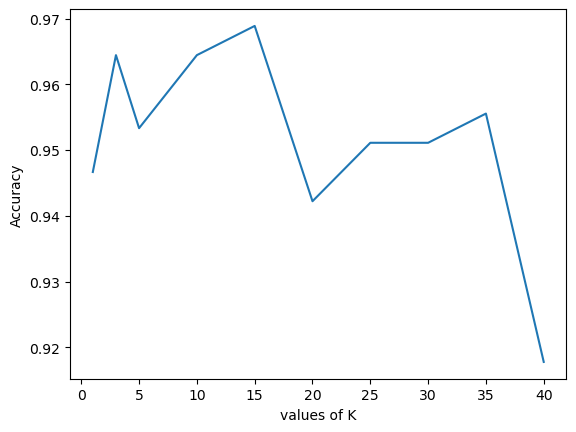

In [81]:
# plotting this DF:
plt.plot(k_vals, compare_df['Avg_accuracy'])
plt.xlabel('values of K')
plt.ylabel('Accuracy')